In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

In [72]:
df_100 = pd.read_csv("TOT_DATA.csv")
df_100

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,WS,WS/48,ORtg,DRtg
0,1,Jaylen Adams,PG,23,POR,3,0,21,3,9,...,2,1,0,0,1,6,0.0,-0.051,87.0,116.0
1,2,Steven Adams,C,26,OKC,7,7,210,31,52,...,9,4,2,16,10,71,0.5,0.108,111.0,109.0
2,3,Bam Adebayo,PF,22,MIA,9,9,318,53,98,...,43,8,7,24,27,146,1.4,0.212,123.0,104.0
3,4,Jarrett Allen,C,21,BRK,4,4,132,14,24,...,9,2,7,11,7,41,0.2,0.077,117.0,117.0
4,5,Justin Anderson,SF,26,BRK,3,0,28,5,12,...,3,0,1,2,2,19,0.1,0.112,121.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,Marvin Williams,PF,33,MIL,10,0,179,21,47,...,9,5,3,3,14,55,0.5,0.138,123.0,108.0
211,212,Robert Williams,C,22,BOS,9,0,104,17,23,...,9,2,5,6,15,36,0.5,0.244,134.0,101.0
212,213,Nigel Williams-Goss,PG,25,UTA,1,0,2,0,0,...,1,0,0,0,0,0,0.0,0.231,239.0,127.0
213,214,Delon Wright,SG,27,DAL,4,0,53,6,10,...,7,5,0,5,2,16,0.0,0.030,107.0,118.0


In [73]:
df_100 = df_100.fillna(0)
df_100 = df_100[df_100['Tm'] != 'TOT']
df_100['MINMED'] = df_100.apply( lambda row: row['MP']/row['G'], axis = 1)
df_100 = df_100[df_100['MP'] > 0]
df_100


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,WS,WS/48,ORtg,DRtg,MINMED
0,1,Jaylen Adams,PG,23,POR,3,0,21,3,9,...,1,0,0,1,6,0.0,-0.051,87.0,116.0,7.000000
1,2,Steven Adams,C,26,OKC,7,7,210,31,52,...,4,2,16,10,71,0.5,0.108,111.0,109.0,30.000000
2,3,Bam Adebayo,PF,22,MIA,9,9,318,53,98,...,8,7,24,27,146,1.4,0.212,123.0,104.0,35.333333
3,4,Jarrett Allen,C,21,BRK,4,4,132,14,24,...,2,7,11,7,41,0.2,0.077,117.0,117.0,33.000000
4,5,Justin Anderson,SF,26,BRK,3,0,28,5,12,...,0,1,2,2,19,0.1,0.112,121.0,120.0,9.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,Marvin Williams,PF,33,MIL,10,0,179,21,47,...,5,3,3,14,55,0.5,0.138,123.0,108.0,17.900000
211,212,Robert Williams,C,22,BOS,9,0,104,17,23,...,2,5,6,15,36,0.5,0.244,134.0,101.0,11.555556
212,213,Nigel Williams-Goss,PG,25,UTA,1,0,2,0,0,...,0,0,0,0,0,0.0,0.231,239.0,127.0,2.000000
213,214,Delon Wright,SG,27,DAL,4,0,53,6,10,...,5,0,5,2,16,0.0,0.030,107.0,118.0,13.250000


<AxesSubplot:>

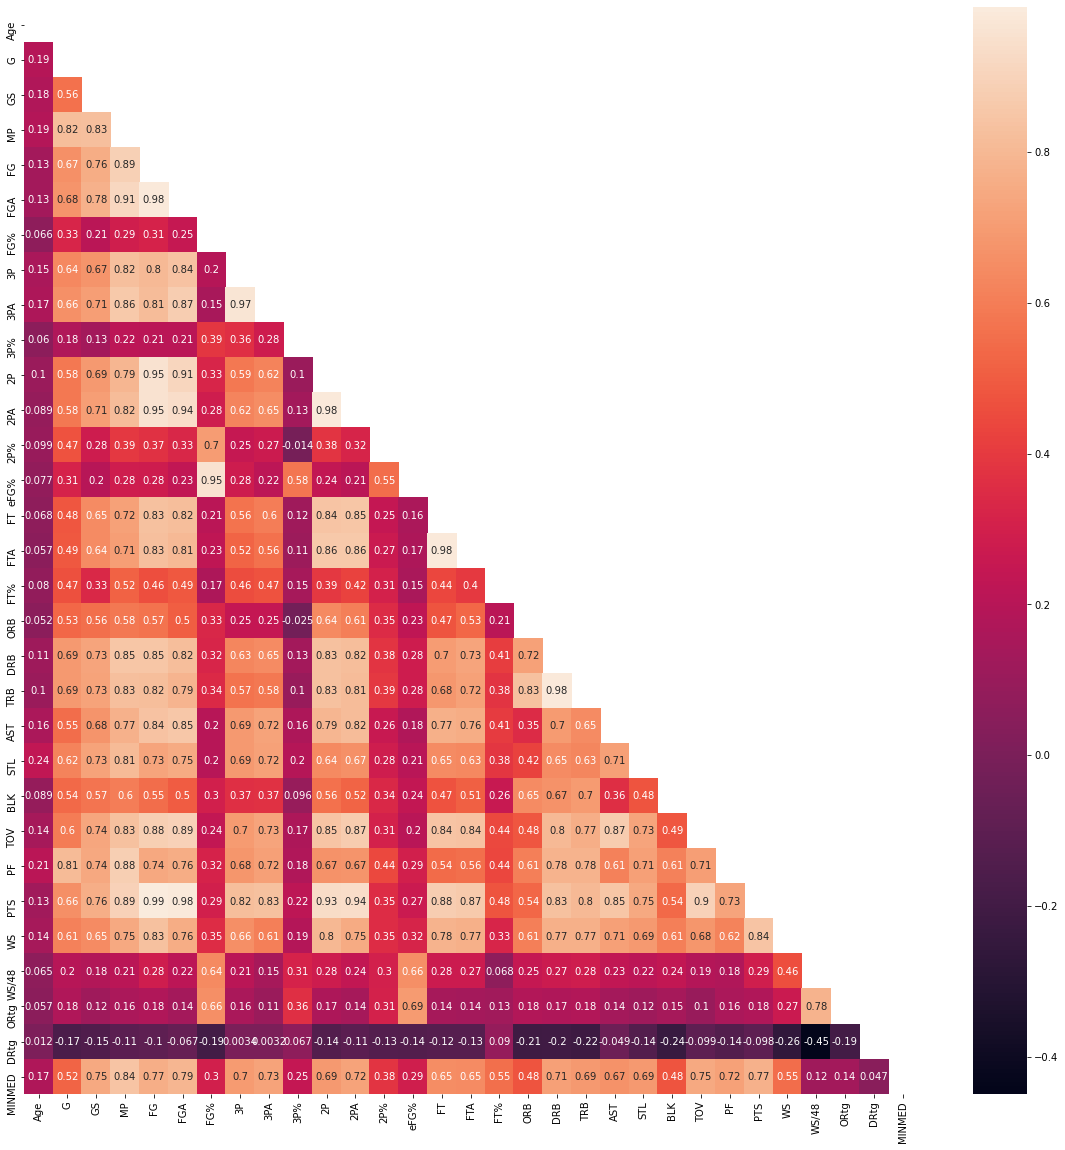

In [74]:
df_heat = df_100.iloc[:,3:]
plt.figure(figsize=(20,20))
matrix = np.triu(df_heat.corr())
sns.heatmap(df_heat.corr(), annot= True, mask=matrix)

In [75]:
df_heat.dtypes

Age         int64
Tm         object
G           int64
GS          int64
MP          int64
FG          int64
FGA         int64
FG%       float64
3P          int64
3PA         int64
3P%       float64
2P          int64
2PA         int64
2P%       float64
eFG%      float64
FT          int64
FTA         int64
FT%       float64
ORB         int64
DRB         int64
TRB         int64
AST         int64
STL         int64
BLK         int64
TOV         int64
PF          int64
PTS         int64
WS        float64
WS/48     float64
ORtg      float64
DRtg      float64
MINMED    float64
dtype: object

In [76]:
# creeam un nou data frame pentru a calcula care jucator are cele mai mari sanse pt MVP 
new_df = pd.DataFrame(columns = ['Name', 'Age', 'Team','MP'])
new_df['Name'] = df_100['Player']
new_df['Age'] = df_100['Age']
new_df['Team'] = df_100['Tm']
new_df['MP'] = df_100['MP']


In [77]:
new_df.head(20)

,Name,Age,Team,MP
0,Jaylen Adams,23,POR,21
1,Steven Adams,26,OKC,210
2,Bam Adebayo,22,MIA,318
3,Jarrett Allen,21,BRK,132
4,Justin Anderson,26,BRK,28
5,Giannis Antetokounmpo,25,MIL,277
6,Carmelo Anthony,35,POR,176
7,OG Anunoby,22,TOR,357
8,D.J. Augustin,32,ORL,128
9,J.J. Barea,35,DAL,5


In [78]:
df_TEAM = pd.read_csv("TOT_TEAM_DATA.csv")

In [79]:
df_TEAM

,Rk,Team,TM,G,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,W
0,1,Los Angeles Clippers,LAC,10,2425,429,867,0.495,122,323,...,92,365,457,212,73,36,132,234,1190,7
1,2,Denver Nuggets,DEN,11,2665,428,939,0.456,150,389,...,113,340,453,244,66,50,140,244,1169,5
2,3,Toronto Raptors,TOR,10,2450,399,898,0.444,153,415,...,83,364,447,256,77,54,126,224,1116,7
3,4,Milwaukee Bucks,MIL,10,2425,401,871,0.460,133,371,...,94,373,467,243,72,42,149,217,1111,5
4,5,Houston Rockets,HOU,10,2425,388,875,0.443,176,479,...,70,339,409,214,93,33,132,219,1096,5
5,6,Boston Celtics,BOS,10,2450,381,839,0.454,127,361,...,79,380,459,213,63,54,140,219,1092,7
6,7,Miami Heat,MIA,9,2185,336,729,0.461,127,334,...,76,328,404,220,72,37,133,170,1009,8
7,8,Los Angeles Lakers,LAL,8,1920,339,686,0.494,93,270,...,90,277,367,203,69,49,123,166,912,6
8,9,Utah Jazz,UTA,7,1705,279,573,0.487,110,261,...,65,223,288,150,43,22,84,133,794,3
9,10,Oklahoma City Thunder,OKC,7,1705,257,598,0.430,84,256,...,63,286,349,125,37,28,119,120,728,3


In [80]:
Total_Stats_List = []
for index, player in df_100.iterrows():
    #TeTS = df_teams.loc[df_teams['Tm'] == player['Tm']]['TS%'] # iau jucatori si le caut echipele si iau de la echipe statusurile de care am neboie pentru a calcula
    #print('player {} : team {} : TS% {}'.format(player['Player'],player['Tm'],TeTS))
    
    points = player['PTS']
    blocks = player['BLK']
    steals = player['STL']
    turnovers = player['TOV']
    assists = player['AST']
    fouls = player['PF']
    rebounds = player['TRB']
    tsa = player['FGA'] + 0.44 * player['FTA']
    if tsa == 0 :
        true_shooting = 0
    else :
        true_shooting = points / (tsa*2)
    
    Total_Stats = (points * true_shooting +1.5*assists + 1.2*rebounds + 3*blocks + 3*steals
                   - fouls - turnovers)/25
    #print(Total_Stats)
    Total_Stats_List.append(Total_Stats)
#print(Total_Stats_List)
new_df['Tot_Stats']=Total_Stats_List
new_df

,Name,Age,Team,MP,Tot_Stats
0,Jaylen Adams,23,POR,21,0.424000
1,Steven Adams,26,OKC,210,5.766224
2,Bam Adebayo,22,MIA,318,10.985548
3,Jarrett Allen,21,BRK,132,4.815119
4,Justin Anderson,26,BRK,28,1.048709
...,...,...,...,...,...
210,Marvin Williams,33,MIL,179,4.376070
211,Robert Williams,22,BOS,104,3.248571
212,Nigel Williams-Goss,25,UTA,2,0.060000
213,Delon Wright,27,DAL,53,1.303672


In [81]:
a=0.123391
b=0.119597
c=-0.151287
d=1.255644
e=0.531838
f=-0.305868
g=0.921292
h=0.711217
i=0.017022
j=0.297639
k=0.213485
l=0.725930
lgOffrtg =df_100['ORtg'].mean()
 # •	League Offensive Rating [LgOffRtg];
lg3P_list = [38.0, 37.9,37.7,37.6,37.4,37.1,37.0,36.8,36.8,36.7,36.7,36.4,36.4,36.3,35.9,35.8,35.5,
35.5,35.2,
35.1,
34.9,
34.8,
34.7,
34.5,
34.3,
34.3,
33.7,
33.6,
33.4,
33.3] # •	League 3-point frequency [Lg%3P];
#print(df_100['3PA'].sum()/df_100['FGA'].sum())
#df_teams.groupby('OFFRTG', as_index=False).mean()
lg3P = round(df_100['3PA'].sum()/df_100['FGA'].sum(),3)
print(lg3P)

0.433


In [82]:
df_100['Tm'].unique()

array(['POR', 'OKC', 'MIA', 'BRK', 'MIL', 'TOR', 'ORL', 'DAL', 'DEN',
       'LAC', 'UTA', 'IND', 'BOS', 'PHI', 'HOU', 'LAL'], dtype=object)

In [83]:
df_TEAM['TM'].unique()
lgT3P = df_TEAM['3PA'].sum()/df_TEAM['FGA'].sum()
#print(lgT3P)

In [84]:
df_opp = pd.read_csv("po_opp_team.csv")

In [85]:
df_opp

,Rk,Team,TM,G,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Indiana Pacers,IND,4,960,150,323,0.464,52,133,...,0.782,37,145,182,96,35,17,57,63,445
1,2,Philadelphia 76ers,PHI,4,960,156,345,0.452,49,140,...,0.815,39,134,173,76,27,22,42,97,449
2,3,Brooklyn Nets,BRK,4,960,180,364,0.495,71,164,...,0.787,37,167,204,122,28,22,48,90,505
3,4,Orlando Magic,ORL,5,1200,212,440,0.482,79,206,...,0.716,40,212,252,137,35,19,83,103,581
4,5,Portland Trail Blazers,POR,5,1200,214,442,0.484,60,175,...,0.700,62,180,242,130,44,29,75,114,586
5,6,Dallas Mavericks,DAL,6,1465,271,541,0.501,84,208,...,0.812,52,226,278,127,43,20,72,147,760
6,7,Utah Jazz,UTA,7,1705,281,603,0.466,106,252,...,0.850,74,220,294,155,34,32,84,149,770
7,8,Oklahoma City Thunder,OKC,7,1705,276,635,0.435,128,357,...,0.809,52,251,303,150,65,27,89,161,773
8,9,Los Angeles Lakers,LAL,8,1920,300,681,0.441,106,275,...,0.794,67,253,320,153,65,24,123,183,856
9,10,Miami Heat,MIA,9,2185,335,752,0.445,102,293,...,0.749,77,284,361,196,74,45,127,207,933


In [86]:
df_opp['Poss'] = df_opp.apply(lambda row: 0.96*(row['FGA'] + row['TOV'] +0.44*row['FTA']-row['ORB']), axis = 1)

In [87]:
df_TEAM['Poss'] = df_TEAM.apply(lambda row: round(0.96*(row['FGA'] + row['TOV'] +0.44*row['FTA']-row['ORB']),1), axis = 1)
df_TEAM['OppPts'] = df_opp['PTS']
df_TEAM['OFFRTG'] = df_TEAM.apply(lambda row: round(row['PTS']/row['Poss']*100,1), axis = 1)
df_TEAM['DEFRTG'] = df_TEAM.apply(lambda row: round(row['OppPts']/row['Poss']*100,1), axis = 1)
df_TEAM['NETRTG'] = df_TEAM.apply(lambda row: round(row['OFFRTG'] - row['DEFRTG'],1),axis = 1)
df_TEAM['MIN'] = df_TEAM.apply( lambda row: round(row['MP']/row['G'],1), axis=1)
df_TEAM['TS%'] = df_TEAM.apply(lambda row: round(100*row['PTS']/(2*(row['FGA']+0.44*row['FTA'])),1),axis = 1)
df_TEAM.to_csv("TEAM_DATA_TOT.csv")
df_TEAM

,Rk,Team,TM,G,MP,FG,FGA,FG%,3P,3PA,...,PF,PTS,W,Poss,OppPts,OFFRTG,DEFRTG,NETRTG,MIN,TS%
0,1,Los Angeles Clippers,LAC,10,2425,429,867,0.495,122,323,...,234,1190,7,983.5,445,121.0,45.2,75.8,242.5,60.4
1,2,Denver Nuggets,DEN,11,2665,428,939,0.456,150,389,...,244,1169,5,1011.8,449,115.5,44.4,71.1,242.3,56.9
2,3,Toronto Raptors,TOR,10,2450,399,898,0.444,153,415,...,224,1116,7,994.2,505,112.3,50.8,61.5,245.0,56.2
3,4,Milwaukee Bucks,MIL,10,2425,401,871,0.460,133,371,...,217,1111,5,991.6,581,112.0,58.6,53.4,242.5,56.8
4,5,Houston Rockets,HOU,10,2425,388,875,0.443,176,479,...,219,1096,5,975.1,586,112.4,60.1,52.3,242.5,57.5
5,6,Boston Celtics,BOS,10,2450,381,839,0.454,127,361,...,219,1092,7,968.3,760,112.8,78.5,34.3,245.0,57.6
6,7,Miami Heat,MIA,9,2185,336,729,0.461,127,334,...,170,1009,8,862.7,770,117.0,89.3,27.7,242.8,59.9
7,8,Los Angeles Lakers,LAL,8,1920,339,686,0.494,93,270,...,166,912,6,774.7,773,117.7,99.8,17.9,240.0,58.9
8,9,Utah Jazz,UTA,7,1705,279,573,0.487,110,261,...,133,794,3,637.2,856,124.6,134.3,-9.7,243.6,61.6
9,10,Oklahoma City Thunder,OKC,7,1705,257,598,0.430,84,256,...,120,728,3,698.8,933,104.2,133.5,-29.3,243.6,54.2


In [88]:
gBPM_LIST = []
ORPer_list =[]
DRPer_list = []
TRPer_list = []
STPer_list = []
BLKPer_list = []
ASTPer_list = []
USGPer_list = []
TOPer_list = []
TSPer_list = []
BPM_list = []
for index, player in df_100.iterrows():
#•	Minutes played [MP];
    MP = player['MP']
#•	Team minutes played [TeMP];
    TeMP = df_TEAM.loc[df_TEAM['TM'] == player['Tm']]['MP'].values
    TeMP = TeMP[0]
#•	Game played [GP];
    GP = player['G']

    COEF = 5*MP/(TeMP)

    #print(COEF)
#•	Offensive Rebound Percentage [OR%];
    #OR%=(OR\(TeOR+OppDR)*(5*MP)/TeMP)*100
    OR = player['ORB']
    TeOR = df_TEAM.loc[df_TEAM['TM'] == player['Tm']]['ORB'].values
    TeOR = TeOR[0]
    OppDR = df_opp.loc[df_opp['TM'] == player['Tm']]['DRB'].values
    OppDR = OppDR[0]

    ORPer = round((OR/((TeOR+OppDR)*COEF))*100,1)
    ORPer_list.append(ORPer)

#•	Defensive Rebound Percentage [DR%];
    #DR%=(DR\(TeDR+OppOR)*(5*MP)/TeMP)*100
    DR = player['DRB']
    TeDR= df_TEAM.loc[df_TEAM['TM'] == player['Tm']]['DRB'].values
    TeDR = TeDR[0]
    OppOR = df_opp.loc[df_opp['TM'] == player['Tm']]['ORB'].values
    OppOR = OppOR[0]

    DRPer = round((DR/((TeDR+OppOR)*COEF))*100,1)
    DRPer_list.append(DRPer)

#•	Total Rebound Percentage [TR%];
    TR = player['TRB']
    TeTR = df_TEAM.loc[df_TEAM['TM'] == player['Tm']]['TRB'].values
    TeTR = TeTR[0]
    OppTR = df_opp.loc[df_opp['TM'] == player['Tm']]['TRB'].values
    OppTR = OppTR[0]

    TRPer = round((TR/((TeTR+OppTR)*COEF))*100,1)
    TRPer_list.append(TRPer)

#•	Steal Percentage [ST%];
    ST = player['STL']
    OppPoss = df_opp.loc[df_opp['TM'] == player['Tm']]['Poss'].values
    OppPoss = OppPoss[0]

    STPer = round(100*(ST*(TeMP/5))/(MP*OppPoss),1)
    STPer_list.append(STPer)

#•	Block Percentage [BLK%];
    BLK = player['BLK']
    OppFGA = df_opp.loc[df_opp['TM'] == player['Tm']]['FGA'].values
    OppFGA = OppFGA[0]
    Opp3P = df_opp.loc[df_opp['TM'] == player['Tm']]['3PA'].values
    Opp3P = Opp3P[0]

    BLKPer = round((BLK/((OppFGA-Opp3P)*COEF))*100,1)
    BLKPer_list.append(BLKPer)


#•	Assist Percentage [Ast%];
    AST = player['AST']
    FGM = player['FG']
    TmFGM = df_TEAM.loc[df_TEAM['TM'] == player['Tm']]['FG'].values
    TmFGM = TmFGM[0]

    ASTPer = round(100*AST/(((MP/(TeMP/5))*TmFGM)-FGM),1)
    ASTPer_list.append(ASTPer)

#•	Usage Percentage [Usg%];
    FGA = player['FGA']
    FTA = player['FTA']
    TO = player['TOV']
    TmFGA = df_TEAM.loc[df_TEAM['TM'] == player['Tm']]['FGA'].values
    TmFGA = TmFGA[0]
    TmFTA = df_TEAM.loc[df_TEAM['TM'] == player['Tm']]['FTA'].values
    TmFTA = TmFTA[0]
    TmTO = df_TEAM.loc[df_TEAM['TM'] == player['Tm']]['TOV'].values
    TmTO = TmTO[0]
    
    if(FGA == 0 & FTA == 0) :
         FGACOEF = 0
    else :
         FGACOEF = FGA + 0.44*FTA

    #•	True Shooting Percentage [TS%];
    PTS = player['PTS']
    if FGACOEF != 0 :
        TSPer = round((PTS)/(2*(FGACOEF)),3)
    else :
        TSPER = 0
    TSPer_list. append(TSPer)


    USGPer = round((FGACOEF+TO)/((TmFGA + 0.44*TmFTA + TmTO)*(COEF))*100,1)
    USGPer_list.append(USGPer)


#•	Turnover Percentage/Ratio [TO%];
    if FGACOEF+TO != 0 :
        TOPer = round((TO)/(FGACOEF+TO),3)
    else :
        TOPer = 0
    TOPer_list.append(TOPer)





#•	Team true Shooting Percentage [TeTS%];
    TmTS = df_TEAM.loc[df_TEAM['TM'] == player['Tm']]['TS%'].values
    TmTS = TmTS[0]
    TmTS = TmTS/100
#•	3-point frequency [%3P];
    PA3 = player['3PA']
    if FGA != 0 :
        P3Freq = round(PA3/FGA,3)
    else :
        P3Freq = 0
#•	League 3-point frequency [Lg%3P];
    Lg3P = lg3P
#•	Team Net Rating [TmNetRtg];
    TmNetRtg = df_TEAM.loc[df_TEAM['TM'] == player['Tm']]['NETRTG'].values
    TmNetRtg = TmNetRtg[0]
#•	Team Offensive Rating [TmOffRtg];
    TmOffRtg = df_TEAM.loc[df_TEAM['TM'] == player['Tm']]['OFFRTG'].values
    TmOffRtg = TmOffRtg[0]
#•	League Offensive Rating [LgOffRtg];
    LgOffRtg = round(df_TEAM['OFFRTG'].mean(),3)

    gBPM1 = (a*MP)/(GP+2)
    gBPM2 = b*ORPer
    gBPM3 = c*DRPer
    gBPM4 = d*STPer
    gBPM5 = e*BLKPer
    gBPM6 = f*ASTPer
    gBPM7 = g*USGPer*TOPer

    gBPM8 = h * USGPer * (1 - TOPer)*(2 * (TSPer-TmTS) + i * ASTPer + j * (P3Freq - Lg3P) -k)

    if( ASTPer > 0) :
        gBPM9 = l* math.sqrt(TRPer*ASTPer)
    else :
        gBPM9 = 0

    gBPM = gBPM1 + gBPM2 + gBPM3 + gBPM4 + gBPM5 + gBPM6 - gBPM7 + gBPM8 + gBPM9

    BPM_list.append(round(gBPM,1))
    print(gBPM)

new_df['OR%'] = ORPer_list
new_df['DR%'] = DRPer_list
new_df['TR%'] = TRPer_list
new_df['ST%'] = STPer_list
new_df['BLK%'] = BLKPer_list
new_df['AST%'] = ASTPer_list
new_df['USG%'] = USGPer_list
new_df['TO%'] = TOPer_list
new_df['TS%'] = TSPer_list
new_df['gBPM'] = BPM_list

0.9512887552884184
5.653969872151703
9.516036085179271
8.145470782135675
9.801935083568381
17.192869573850516
1.7459878760184484
7.478258721113589
1.6971021096467132
-10.687929904402536
-2.393898169091263
4.3647236011141874
6.729311053649493
4.235967959099191
4.616227445774793
12.231041779769917
-1.1417460462593514
-0.7623353092132135
-3.0095026939517933
6.510981657150785
4.517666306548434
-13.01979325843512
5.119120078129163
1.9829719008818536
0.08226066666666666
8.960029622477526
30.740843463196907
1.8987270682433208
2.657306945196982
4.614863867792103
5.448632960297713
6.450851501129205
3.4921766068941684
-4.101772066666667
-3.4455502175258843
-7.853857584452687
9.988844014404199
3.8177308266367334
0.1159159719380467
-8.897569966666667
12.607741397628475
2.8353857004468415
7.544759887634886
4.9145351451315875
-1.74966084557939
14.632321732920087
4.242485067128167
1.5255191023741004
4.792634786987291
13.038710260539341
0.6221700410444675
-0.8236683073812019
6.546676561281396
-0.34466

In [89]:
df_100['gBPM'] = new_df['gBPM']
df_100['gBPM']

0       1.0
1       5.7
2       9.5
3       8.1
4       9.8
       ... 
210     6.2
211    10.2
212   -18.6
213     3.8
214     4.5
Name: gBPM, Length: 212, dtype: float64

In [90]:
TM_list = df_TEAM['TM']

In [91]:
TM_list

0     LAC
1     DEN
2     TOR
3     MIL
4     HOU
5     BOS
6     MIA
7     LAL
8     UTA
9     OKC
10    DAL
11    ORL
12    POR
13    BRK
14    IND
15    PHI
Name: TM, dtype: object

In [92]:
TeAdC_list = []
for tm_abv in TM_list:
    df_teadc = df_100[df_100['Tm'] == tm_abv]
    df_teadc
    suma = 0
    TeMP = df_TEAM.loc[df_TEAM['TM'] == tm_abv]['MP'].values
    TeMP = TeMP[0]
    for index, player in df_teadc.iterrows():
        MP = player['MP']
        gBPM = player['gBPM']
        COEF = 5*MP/TeMP
        COEF = COEF*gBPM
        suma = suma + COEF
    TmNetRtg = df_TEAM.loc[df_TEAM['TM'] == tm_abv]['NETRTG'].values
    TmNetRtg = TmNetRtg[0]
    TeAdC = (TmNetRtg*1.20 - suma)/5
    TeAdC_list.append(round(TeAdC,1))
    print(suma , tm_abv)
TeAdC_list
df_TEAM['TeAdC'] = TeAdC_list


26.6259793814433 LAC
31.49399624765479 DEN
34.54489795918368 TOR
31.263711340206186 MIL
36.09690721649484 HOU
30.720612244897957 BOS
34.4883295194508 MIA
33.316927083333326 LAL
27.155131964809378 UTA
22.525806451612905 OKC
26.691126279863482 DAL
22.523333333333333 ORL
21.03875 POR
22.4234375 BRK
25.054166666666667 IND
24.535416666666666 PHI


In [93]:
df_TEAM

,Rk,Team,TM,G,MP,FG,FGA,FG%,3P,3PA,...,PTS,W,Poss,OppPts,OFFRTG,DEFRTG,NETRTG,MIN,TS%,TeAdC
0,1,Los Angeles Clippers,LAC,10,2425,429,867,0.495,122,323,...,1190,7,983.5,445,121.0,45.2,75.8,242.5,60.4,12.9
1,2,Denver Nuggets,DEN,11,2665,428,939,0.456,150,389,...,1169,5,1011.8,449,115.5,44.4,71.1,242.3,56.9,10.8
2,3,Toronto Raptors,TOR,10,2450,399,898,0.444,153,415,...,1116,7,994.2,505,112.3,50.8,61.5,245.0,56.2,7.9
3,4,Milwaukee Bucks,MIL,10,2425,401,871,0.460,133,371,...,1111,5,991.6,581,112.0,58.6,53.4,242.5,56.8,6.6
4,5,Houston Rockets,HOU,10,2425,388,875,0.443,176,479,...,1096,5,975.1,586,112.4,60.1,52.3,242.5,57.5,5.3
5,6,Boston Celtics,BOS,10,2450,381,839,0.454,127,361,...,1092,7,968.3,760,112.8,78.5,34.3,245.0,57.6,2.1
6,7,Miami Heat,MIA,9,2185,336,729,0.461,127,334,...,1009,8,862.7,770,117.0,89.3,27.7,242.8,59.9,-0.2
7,8,Los Angeles Lakers,LAL,8,1920,339,686,0.494,93,270,...,912,6,774.7,773,117.7,99.8,17.9,240.0,58.9,-2.4
8,9,Utah Jazz,UTA,7,1705,279,573,0.487,110,261,...,794,3,637.2,856,124.6,134.3,-9.7,243.6,61.6,-7.8
9,10,Oklahoma City Thunder,OKC,7,1705,257,598,0.430,84,256,...,728,3,698.8,933,104.2,133.5,-29.3,243.6,54.2,-11.5


In [94]:
BPM_list = []
new_df['gBPM'] = df_100['gBPM']
for index,player in df_100.iterrows():
    gBPM = player['gBPM']
    TeAdC = df_TEAM.loc[df_TEAM['TM'] == player['Tm']]['TeAdC'].values
    TeAdC = TeAdC[0]
    BPM = gBPM + TeAdC
    BPM_list.append(round(BPM,1))
new_df['BPM'] = BPM_list

In [95]:
df_1000 = new_df[new_df['MP']>1000]
df_1000

,Name,Age,Team,MP,Tot_Stats,OR%,DR%,TR%,ST%,BLK%,AST%,USG%,TO%,TS%,gBPM,BPM


In [96]:
tm_abv = 'CHO'
df_teadc = df_100[df_100['Tm'] == tm_abv]
df_teadc
df_TEAM

,Rk,Team,TM,G,MP,FG,FGA,FG%,3P,3PA,...,PTS,W,Poss,OppPts,OFFRTG,DEFRTG,NETRTG,MIN,TS%,TeAdC
0,1,Los Angeles Clippers,LAC,10,2425,429,867,0.495,122,323,...,1190,7,983.5,445,121.0,45.2,75.8,242.5,60.4,12.9
1,2,Denver Nuggets,DEN,11,2665,428,939,0.456,150,389,...,1169,5,1011.8,449,115.5,44.4,71.1,242.3,56.9,10.8
2,3,Toronto Raptors,TOR,10,2450,399,898,0.444,153,415,...,1116,7,994.2,505,112.3,50.8,61.5,245.0,56.2,7.9
3,4,Milwaukee Bucks,MIL,10,2425,401,871,0.460,133,371,...,1111,5,991.6,581,112.0,58.6,53.4,242.5,56.8,6.6
4,5,Houston Rockets,HOU,10,2425,388,875,0.443,176,479,...,1096,5,975.1,586,112.4,60.1,52.3,242.5,57.5,5.3
5,6,Boston Celtics,BOS,10,2450,381,839,0.454,127,361,...,1092,7,968.3,760,112.8,78.5,34.3,245.0,57.6,2.1
6,7,Miami Heat,MIA,9,2185,336,729,0.461,127,334,...,1009,8,862.7,770,117.0,89.3,27.7,242.8,59.9,-0.2
7,8,Los Angeles Lakers,LAL,8,1920,339,686,0.494,93,270,...,912,6,774.7,773,117.7,99.8,17.9,240.0,58.9,-2.4
8,9,Utah Jazz,UTA,7,1705,279,573,0.487,110,261,...,794,3,637.2,856,124.6,134.3,-9.7,243.6,61.6,-7.8
9,10,Oklahoma City Thunder,OKC,7,1705,257,598,0.430,84,256,...,728,3,698.8,933,104.2,133.5,-29.3,243.6,54.2,-11.5


In [97]:
new_df

,Name,Age,Team,MP,Tot_Stats,OR%,DR%,TR%,ST%,BLK%,AST%,USG%,TO%,TS%,gBPM,BPM
0,Jaylen Adams,23,POR,21,0.424000,5.0,10.1,7.5,2.3,0.0,14.9,17.9,0.000,0.333,1.0,-28.5
1,Steven Adams,26,OKC,210,5.766224,17.6,22.6,20.2,0.9,1.2,7.1,15.8,0.208,0.584,5.7,-5.8
2,Bam Adebayo,22,MIA,318,10.985548,10.7,26.1,18.9,1.3,2.1,22.5,20.1,0.169,0.617,9.5,9.3
3,Jarrett Allen,21,BRK,132,4.815119,12.1,34.5,22.5,0.7,5.1,10.5,13.1,0.262,0.660,8.1,-35.7
4,Justin Anderson,26,BRK,28,1.048709,0.0,31.0,14.4,0.0,3.4,18.6,23.2,0.127,0.690,9.8,-34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Marvin Williams,33,MIL,179,4.376070,7.7,21.3,14.4,1.4,1.8,7.1,12.3,0.058,0.569,6.2,12.8
211,Robert Williams,22,BOS,104,3.248571,16.0,20.8,18.6,1.0,4.7,14.1,13.5,0.192,0.714,10.2,12.3
212,Nigel Williams-Goss,25,UTA,2,0.060000,0.0,0.0,0.0,0.0,0.0,61.1,0.0,0.000,0.714,-18.6,-26.4
213,Delon Wright,27,DAL,53,1.303672,2.0,4.2,3.1,4.5,0.0,17.6,14.0,0.291,0.656,3.8,-13.8


In [98]:
VORP_list = []
for index, player in new_df.iterrows(): 
    #Box Plus Minus [BPM];
    
    BPM = player['BPM']
    #Minutes played [MP];
    
    MP = player['MP']
    #Team minutes played [TeMP];
    3
    TeMP = df_TEAM.loc[df_TEAM['TM'] == player['Team']]['MP'].values
    TeMP = TeMP[0]
    
    #Team game played [TeGP];
    TeGP = df_TEAM.loc[df_TEAM['TM'] == player['Team']]['G'].values
    TeGP = TeGP[0]
    
    VORP  = (BPM -1*(-2)) *(5*MP/TeMP)*(TeGP/82)
    VORP_list.append(round(VORP,1))
    
new_df['VORP'] = VORP_list

In [99]:
new_df

,Name,Age,Team,MP,Tot_Stats,OR%,DR%,TR%,ST%,BLK%,AST%,USG%,TO%,TS%,gBPM,BPM,VORP
0,Jaylen Adams,23,POR,21,0.424000,5.0,10.1,7.5,2.3,0.0,14.9,17.9,0.000,0.333,1.0,-28.5,-0.1
1,Steven Adams,26,OKC,210,5.766224,17.6,22.6,20.2,0.9,1.2,7.1,15.8,0.208,0.584,5.7,-5.8,-0.2
2,Bam Adebayo,22,MIA,318,10.985548,10.7,26.1,18.9,1.3,2.1,22.5,20.1,0.169,0.617,9.5,9.3,0.9
3,Jarrett Allen,21,BRK,132,4.815119,12.1,34.5,22.5,0.7,5.1,10.5,13.1,0.262,0.660,8.1,-35.7,-1.1
4,Justin Anderson,26,BRK,28,1.048709,0.0,31.0,14.4,0.0,3.4,18.6,23.2,0.127,0.690,9.8,-34.0,-0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Marvin Williams,33,MIL,179,4.376070,7.7,21.3,14.4,1.4,1.8,7.1,12.3,0.058,0.569,6.2,12.8,0.7
211,Robert Williams,22,BOS,104,3.248571,16.0,20.8,18.6,1.0,4.7,14.1,13.5,0.192,0.714,10.2,12.3,0.4
212,Nigel Williams-Goss,25,UTA,2,0.060000,0.0,0.0,0.0,0.0,0.0,61.1,0.0,0.000,0.714,-18.6,-26.4,-0.0
213,Delon Wright,27,DAL,53,1.303672,2.0,4.2,3.1,4.5,0.0,17.6,14.0,0.291,0.656,3.8,-13.8,-0.2


In [100]:
QI_LIST = []
LI_LIST = []
WC_LIST = []
for index, player in df_100.iterrows():
    TW = df_TEAM.loc[df_TEAM['TM'] == player['Tm']]['W'].values
    TW = TW[0]
    
    GP = player['G']
    USG = new_df.loc[new_df['Team'] == player['Tm']]['USG%'].values
    USG = USG[0]
    Min = player['MINMED']
    Level_of_impact = TW*GP/82 *Min/48*USG/100
    LI_LIST.append(round(Level_of_impact,1))
   # print('gp {}  usg{}  Min{} '.format (GP , USG , Min))
   # print (Level_of_impact)
    VORP = new_df.loc[new_df['Team'] == player['Tm']]['VORP'].values
    VORP = VORP[0]
    Net_Rating = player['ORtg'] - player['DRtg']
    Win_Share = player['WS']
    Quality_of_Impact = 0.4*(VORP + Win_Share) + 0.2*Net_Rating
    QI_LIST.append(round(Quality_of_Impact,1))
    WC_LIST.append(round(Quality_of_Impact*Level_of_impact,1))
new_df['L of Im'] = LI_LIST
new_df['Q of Im'] = QI_LIST
new_df['WinC'] = WC_LIST

In [101]:
new_df.head(20)

,Name,Age,Team,MP,Tot_Stats,OR%,DR%,TR%,ST%,BLK%,AST%,USG%,TO%,TS%,gBPM,BPM,VORP,L of Im,Q of Im,WinC
0,Jaylen Adams,23,POR,21,0.424000,5.0,10.1,7.5,2.3,0.0,14.9,17.9,0.000,0.333,1.0,-28.5,-0.1,0.0,-5.8,-0.0
1,Steven Adams,26,OKC,210,5.766224,17.6,22.6,20.2,0.9,1.2,7.1,15.8,0.208,0.584,5.7,-5.8,-0.2,0.0,0.5,0.0
2,Bam Adebayo,22,MIA,318,10.985548,10.7,26.1,18.9,1.3,2.1,22.5,20.1,0.169,0.617,9.5,9.3,0.9,0.1,4.7,0.6
3,Jarrett Allen,21,BRK,132,4.815119,12.1,34.5,22.5,0.7,5.1,10.5,13.1,0.262,0.660,8.1,-35.7,-1.1,0.0,-0.4,-0.0
4,Justin Anderson,26,BRK,28,1.048709,0.0,31.0,14.4,0.0,3.4,18.6,23.2,0.127,0.690,9.8,-34.0,-0.2,0.0,-0.2,-0.0
5,Giannis Antetokounmpo,25,MIL,277,14.110421,10.3,38.2,24.0,1.1,3.1,36.7,35.2,0.132,0.610,17.2,23.8,1.8,0.1,3.9,0.5
6,Carmelo Anthony,35,POR,176,2.877713,0.6,14.4,7.5,1.4,1.0,9.1,20.6,0.149,0.512,1.7,-27.8,-1.2,0.0,-4.3,-0.0
7,OG Anunoby,22,TOR,357,7.867164,7.0,14.0,10.4,1.5,3.9,4.8,13.7,0.135,0.575,7.5,15.4,1.5,0.1,2.0,0.2
8,D.J. Augustin,32,ORL,128,3.232388,0.0,8.4,4.0,0.4,0.0,36.9,22.7,0.176,0.588,1.7,-27.3,-0.8,0.0,-1.0,-0.0
9,J.J. Barea,35,DAL,5,-0.002414,0.0,0.0,0.0,0.0,0.0,0.0,28.6,0.301,0.647,-10.7,-28.3,-0.0,0.0,-6.6,-0.0


In [102]:
Value_List = []
#Value = .5(Win Contribution) + .5(Total Stats)
for index, player in new_df.iterrows():
    WC = player['WinC']
    TotalS = player['Tot_Stats']
    Value =0.5*WC +0.5*TotalS
    Value_List.append(round(Value,1))
new_df['Value'] = Value_List

In [103]:
new_df['Pos'] = df_100['Pos']
new_df

,Name,Age,Team,MP,Tot_Stats,OR%,DR%,TR%,ST%,BLK%,...,TO%,TS%,gBPM,BPM,VORP,L of Im,Q of Im,WinC,Value,Pos
0,Jaylen Adams,23,POR,21,0.424000,5.0,10.1,7.5,2.3,0.0,...,0.000,0.333,1.0,-28.5,-0.1,0.0,-5.8,-0.0,0.2,PG
1,Steven Adams,26,OKC,210,5.766224,17.6,22.6,20.2,0.9,1.2,...,0.208,0.584,5.7,-5.8,-0.2,0.0,0.5,0.0,2.9,C
2,Bam Adebayo,22,MIA,318,10.985548,10.7,26.1,18.9,1.3,2.1,...,0.169,0.617,9.5,9.3,0.9,0.1,4.7,0.6,5.8,PF
3,Jarrett Allen,21,BRK,132,4.815119,12.1,34.5,22.5,0.7,5.1,...,0.262,0.660,8.1,-35.7,-1.1,0.0,-0.4,-0.0,2.4,C
4,Justin Anderson,26,BRK,28,1.048709,0.0,31.0,14.4,0.0,3.4,...,0.127,0.690,9.8,-34.0,-0.2,0.0,-0.2,-0.0,0.5,SF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Marvin Williams,33,MIL,179,4.376070,7.7,21.3,14.4,1.4,1.8,...,0.058,0.569,6.2,12.8,0.7,0.1,3.9,0.3,2.3,PF
211,Robert Williams,22,BOS,104,3.248571,16.0,20.8,18.6,1.0,4.7,...,0.192,0.714,10.2,12.3,0.4,0.0,7.1,0.3,1.8,C
212,Nigel Williams-Goss,25,UTA,2,0.060000,0.0,0.0,0.0,0.0,0.0,...,0.000,0.714,-18.6,-26.4,-0.0,0.0,22.4,0.0,0.0,PG
213,Delon Wright,27,DAL,53,1.303672,2.0,4.2,3.1,4.5,0.0,...,0.291,0.656,3.8,-13.8,-0.2,0.0,-2.2,-0.0,0.7,SG


In [106]:
new_df.to_csv("VALUE_OK_POF.csv")

In [ ]:
df = df[df['MP'] > 1000]